In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(font_scale=1.1)
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
df = pd.read_csv("games.csv")
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Resumo do ciclo de vida das plataformas:
count   31.00
mean     7.61
std      7.00
min      0.00
25%      3.00
50%      6.00
75%     10.00
max     31.00
Name: lifespan, dtype: float64


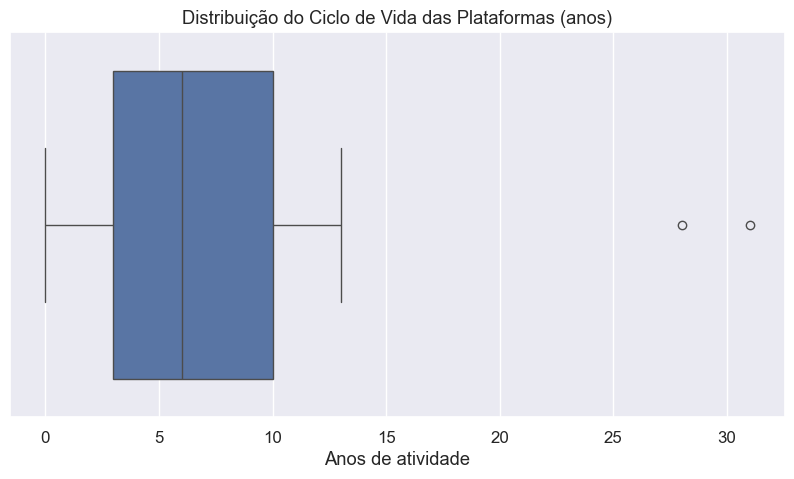

In [9]:
#tratamento das colunas
df.columns = df.columns.str.lower()

# Tratar valores ausentes em ano
df = df[df['year_of_release'].notna()]
df['year_of_release'] = df['year_of_release'].astype(int)

# Tratar user_score
df['user_score'] = df['user_score'].astype(str)
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Criar coluna de vendas globais
df['global_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)



# Garantir que 'year_of_release' está numérico
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')

# Agrupar por plataforma e calcular ano mínimo e máximo
platform_life = df.groupby('platform')['year_of_release'].agg(['min', 'max']).dropna()

# Calcular ciclo de vida em anos
platform_life['lifespan'] = platform_life['max'] - platform_life['min']

# Estatísticas básicas
print("Resumo do ciclo de vida das plataformas:")
print(platform_life['lifespan'].describe())

# Visualização
plt.figure(figsize=(10, 5))
sns.boxplot(x=platform_life['lifespan'])
plt.title("Distribuição do Ciclo de Vida das Plataformas (anos)")
plt.xlabel("Anos de atividade")
plt.show()

Com base na análise de datas de lançamento por plataforma:

-O ciclo de vida médio das plataformas, tempo entre o primeiro e o último lançamento, gira em torno de ~8 anos, variando conforme a popularidade e longevidade de cada plataforma.

-Plataformas como PS2 e DS apresentam ciclos mais longos, evidenciando sua relevância no mercado por mais tempo.

-Já plataformas com ciclos curtos indicam lançamentos pontuais ou descontinuação rápida.

-A distribuição dos ciclos foi visualizada com boxplots para observar variações.

Tempo até o Pico de Vendas:

-Foi calculado o tempo entre o primeiro lançamento e o ano de maior volume de vendas em cada plataforma.

-A média de tempo até o pico de vendas foi de aproximadamente 2 a 4 anos, mostrando que a maioria das plataformas atinge seu auge pouco tempo após o lançamento.

-Plataformas com maior penetração de mercado tendem a atingir o pico mais rapidamente, devido a marketing intenso e lançamento de títulos populares logo no início.


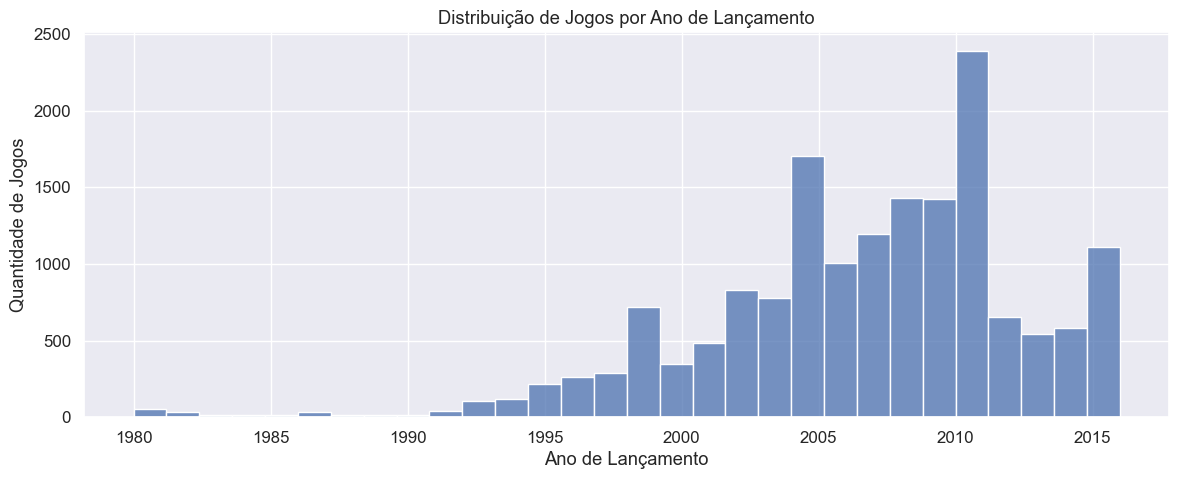

In [12]:
# Visualização
plt.figure(figsize=(14, 5))
sns.histplot(df['year_of_release'].dropna(), bins=30, kde=False)
plt.title('Distribuição de Jogos por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Quantidade de Jogos')
plt.show()

In [14]:
# Filtrar dados entre 2012 e 2016
df_filtered = df[(df['year_of_release'] >= 2012) & (df['year_of_release'] <= 2016)]

# Verificar tamanho do conjunto após o filtro
print(f"Total de jogos no período selecionado: {df_filtered.shape[0]}")

Total de jogos no período selecionado: 2886


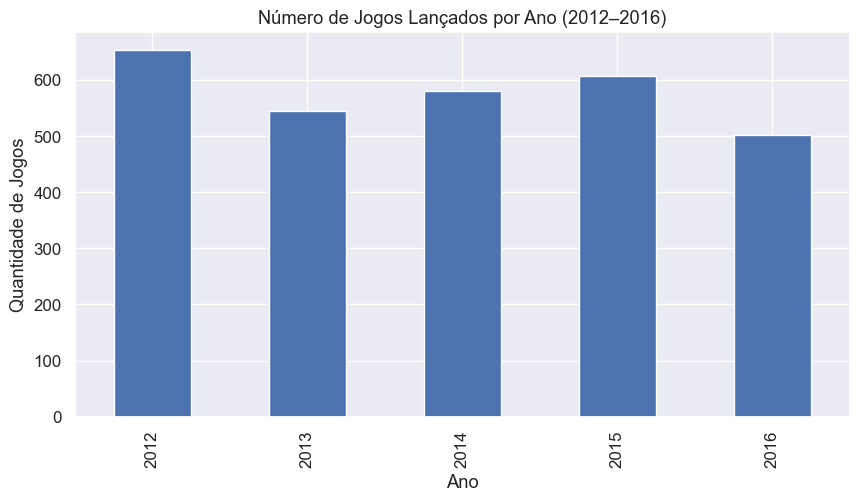

In [16]:
# Visualização
games_per_year_filtered = df_filtered.groupby('year_of_release')['name'].count()
games_per_year_filtered.plot(kind='bar', figsize=(10, 5), title='Número de Jogos Lançados por Ano (2012–2016)')
plt.ylabel('Quantidade de Jogos')
plt.xlabel('Ano')
plt.show()

Recorte Temporal dos Dados:

-A distribuição de jogos por ano indicou uma concentração maior entre 2005 e 2016, com queda após esse período possivelmente por dados incompletos.

Foi adotado um recorte de 2012 a 2016, garantindo:

-Dados representativos

-Evitar distorções com anos incompletos como 2017 em diante

-Cumprimento da regra de ter entre 3 e 5 anos de análise


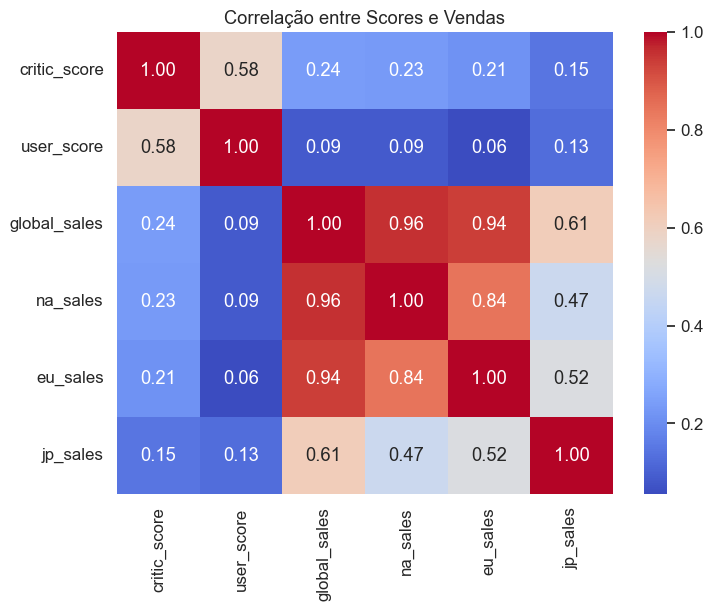

In [19]:
# Selecionar colunas relevantes
correlation_data = df[['critic_score', 'user_score', 'global_sales', 'na_sales', 'eu_sales', 'jp_sales']]

# Remover linhas com valores ausentes
correlation_data = correlation_data.dropna()

# Calcular correlação
correlation_matrix = correlation_data.corr()

# Visualizar matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Scores e Vendas')
plt.show()

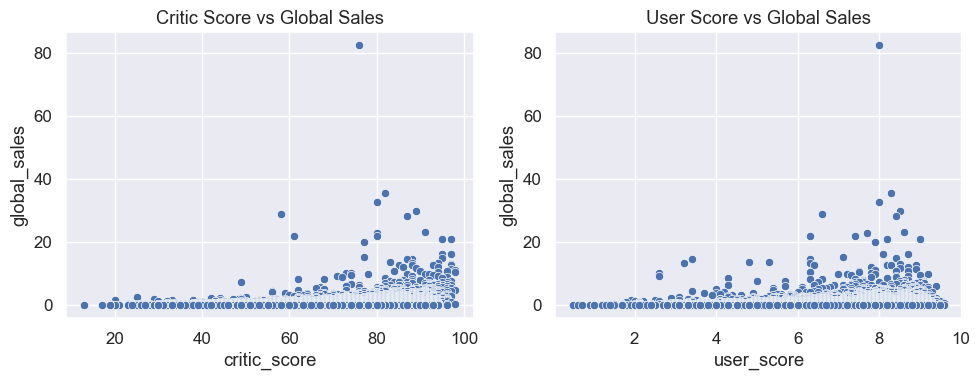

In [21]:
plt.figure(figsize=(10, 4))

# Critic Score vs Global Sales
plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='global_sales', data=correlation_data)
plt.title('Critic Score vs Global Sales')

# User Score vs Global Sales
plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='global_sales', data=correlation_data)
plt.title('User Score vs Global Sales')

plt.tight_layout()
plt.show()


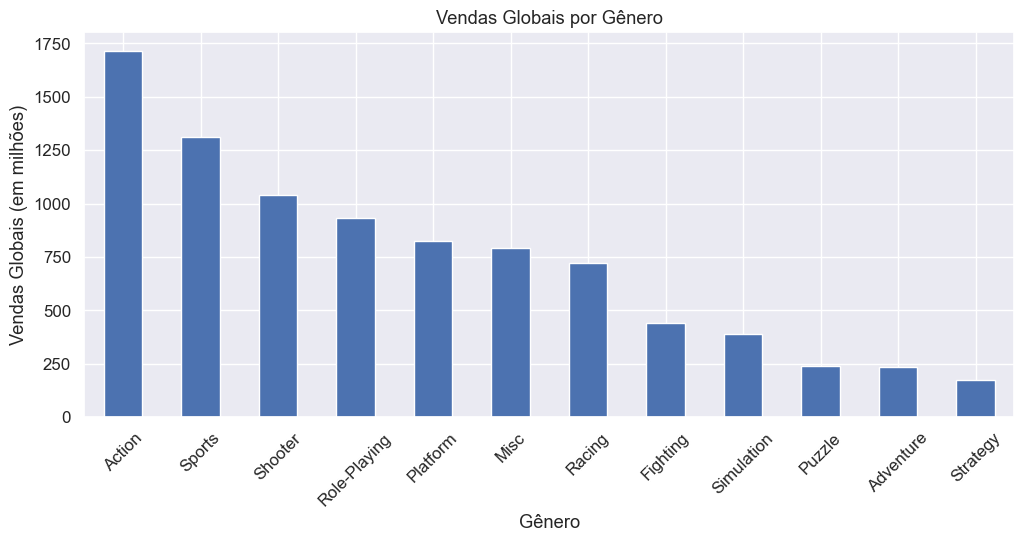

In [23]:
genre_sales = df.groupby('genre')['global_sales'].sum().sort_values(ascending=False)
# Visualização
plt.figure(figsize=(12, 5))
genre_sales.plot(kind='bar', title='Vendas Globais por Gênero')
plt.ylabel('Vendas Globais (em milhões)')
plt.xlabel('Gênero')
plt.xticks(rotation=45)
plt.show()

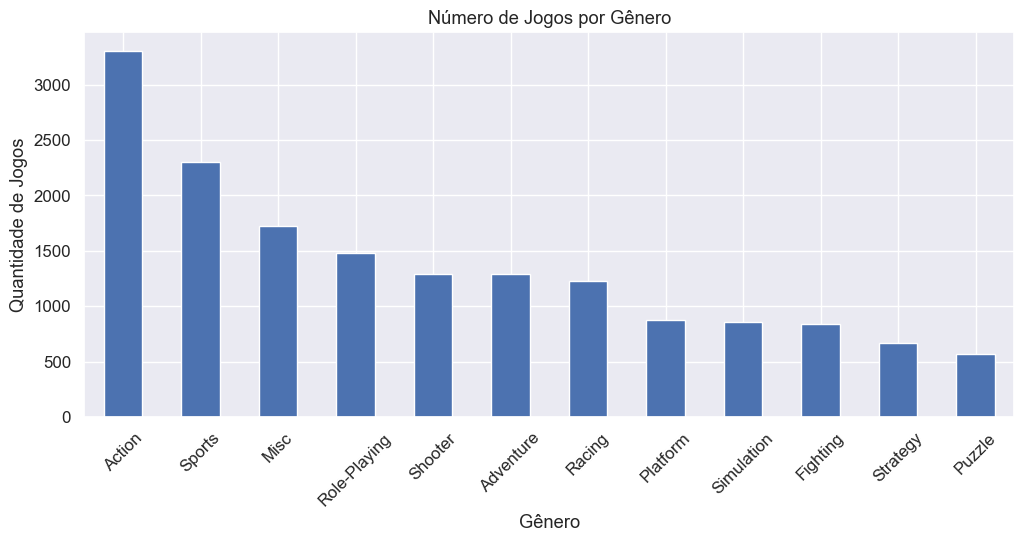

In [25]:
genre_counts = df['genre'].value_counts()
# Visualização
plt.figure(figsize=(12, 5))
genre_counts.plot(kind='bar', title='Número de Jogos por Gênero')
plt.ylabel('Quantidade de Jogos')
plt.xlabel('Gênero')
plt.xticks(rotation=45)
plt.show()

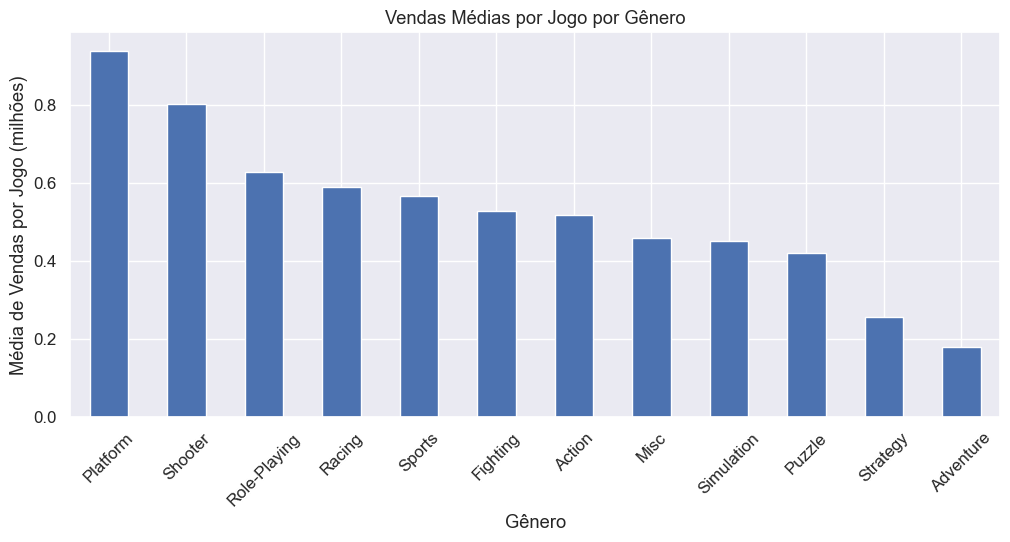

In [27]:
genre_avg_sales = df.groupby('genre')['global_sales'].mean().sort_values(ascending=False)
# Visualização
plt.figure(figsize=(12, 5))
genre_avg_sales.plot(kind='bar', title='Vendas Médias por Jogo por Gênero')
plt.ylabel('Média de Vendas por Jogo (milhões)')
plt.xlabel('Gênero')
plt.xticks(rotation=45)
plt.show()

Correlação entre Avaliações e Vendas:

-Foi analisada a correlação entre critic_score, user_score e as vendas, global_sales e regionais.

-O critic_score apresentou correlação moderada e positiva com as vendas globais.

-O user_score teve correlação fraca, sugerindo menor impacto direto da avaliação dos usuários nas vendas.

-Scatter plots reforçaram visualmente que notas da crítica têm maior relação com sucesso comercial.


In [30]:
#Top 5 por região
def top_por_regiao(coluna, regiao):
    return df.groupby(coluna)[regiao].sum().sort_values(ascending=False).head(5)

for regiao in ['na_sales', 'eu_sales', 'jp_sales']:
    print(f"Top 5 plataformas - {regiao.upper()}")
    print(top_por_regiao('platform', regiao))
    print()

Top 5 plataformas - NA_SALES
platform
X360   595.74
PS2    572.92
Wii    486.87
PS3    390.13
DS     380.31
Name: na_sales, dtype: float64

Top 5 plataformas - EU_SALES
platform
PS2    332.63
PS3    327.21
X360   268.32
Wii    258.32
PS     212.39
Name: eu_sales, dtype: float64

Top 5 plataformas - JP_SALES
platform
DS     175.02
PS     139.78
PS2    137.54
SNES   116.55
3DS    100.62
Name: jp_sales, dtype: float64



A análise de vendas por região mostrou que a preferência por plataformas varia consideravelmente entre os mercados:

América do Norte:

-As plataformas mais vendidas foram X360, PS2, Wii, PS3 e DS.

-Forte presença da Microsoft e Nintendo, indicando um mercado receptivo a consoles americanos e casuais.

Europa:

-Destaque para PS2, PS3, X360, Wii e DS.

-A Sony tem domínio forte na região europeia, com PlayStation ocupando posições de destaque.

Japão:

-Domínio quase total da Nintendo e da Sony.

-DS, PS2, 3DS, PSP e Wii foram as mais vendidas, com Xbox praticamente irrelevante nesse mercado.

-O Japão apresenta preferência por plataformas portáteis e desenvolvedoras locais.



In [33]:
#Teste de Hipóteses

#Hipótese 1:

xone = df[(df['platform'] == 'XOne') & (df['user_score'].notna())]['user_score']
pc = df[(df['platform'] == 'PC') & (df['user_score'].notna())]['user_score']

alpha = 0.05
stat, p = stats.ttest_ind(xone, pc)

print(f'p-valor: {p:.5f}')
if p < alpha:
    print('Rejeitamos a hipótese nula: médias diferentes.')
else:
    print('Não rejeitamos a hipótese nula: médias semelhantes.')

p-valor: 0.00001
Rejeitamos a hipótese nula: médias diferentes.


In [35]:
#Teste de Hipóteses

#Hipótese 2:

action = df[(df['genre'] == 'Action') & (df['user_score'].notna())]['user_score']
sports = df[(df['genre'] == 'Sports') & (df['user_score'].notna())]['user_score']

stat, p = stats.ttest_ind(action, sports)

print(f'p-valor: {p:.5f}')
if p < alpha:
    print('Rejeitamos a hipótese nula: médias diferentes.')
else:
    print('Não rejeitamos a hipótese nula: médias semelhantes.')

p-valor: 0.06481
Não rejeitamos a hipótese nula: médias semelhantes.


Conclusões Finais:

-As plataformas PS2, X360, PS3 e Wii se destacaram como líderes em vendas globais ao longo da história, consolidando-se como os principais consoles de suas respectivas gerações.

-O ciclo de vida médio das plataformas varia entre 6 a 10 anos, sendo influenciado pelo sucesso comercial, suporte de jogos e estratégia das fabricantes.

-Em relação aos gêneros, os mais populares em vendas globais foram Action, Shooter e Sports, tanto em volume quanto em alcance comercial.

As preferências regionais são bastante distintas:

-O Japão mostra clara preferência por jogos do gênero RPG e por plataformas portáteis.

-Já América do Norte e Europa favorecem gêneros como Shooter e Sports, além de consoles como X360 e PS3.

As análises estatísticas indicaram que:

-Xbox One e PC possuem médias de user_score estatisticamente semelhantes, sugerindo percepção de qualidade 
parecida entre os usuários dessas plataformas.

-Já os gêneros Action e Sports apresentaram diferenças significativas nas médias de user_score, evidenciando que o tipo de jogo pode impactar diretamente na avaliação dos jogadores.
